# ***Importing Libraries***

In [ ]:
import pandas as pd
import numpy as np

# ***Loading dataset***

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# ***EDA***

In [ ]:
data.shape

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])

# ***Data Preprocessing***

In [ ]:
data.drop(['RowNumber'], axis = 1, inplace = True)

In [ ]:
data.drop(['CustomerId'], axis = 1, inplace = True)

In [ ]:
data.drop(['Surname'], axis = 1, inplace = True)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x, y)

# ***Feature Engineering***

In [ ]:
data['BalanceSalaryRatio'] = data.Balance / data.EstimatedSalary

# ***Data visualization***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

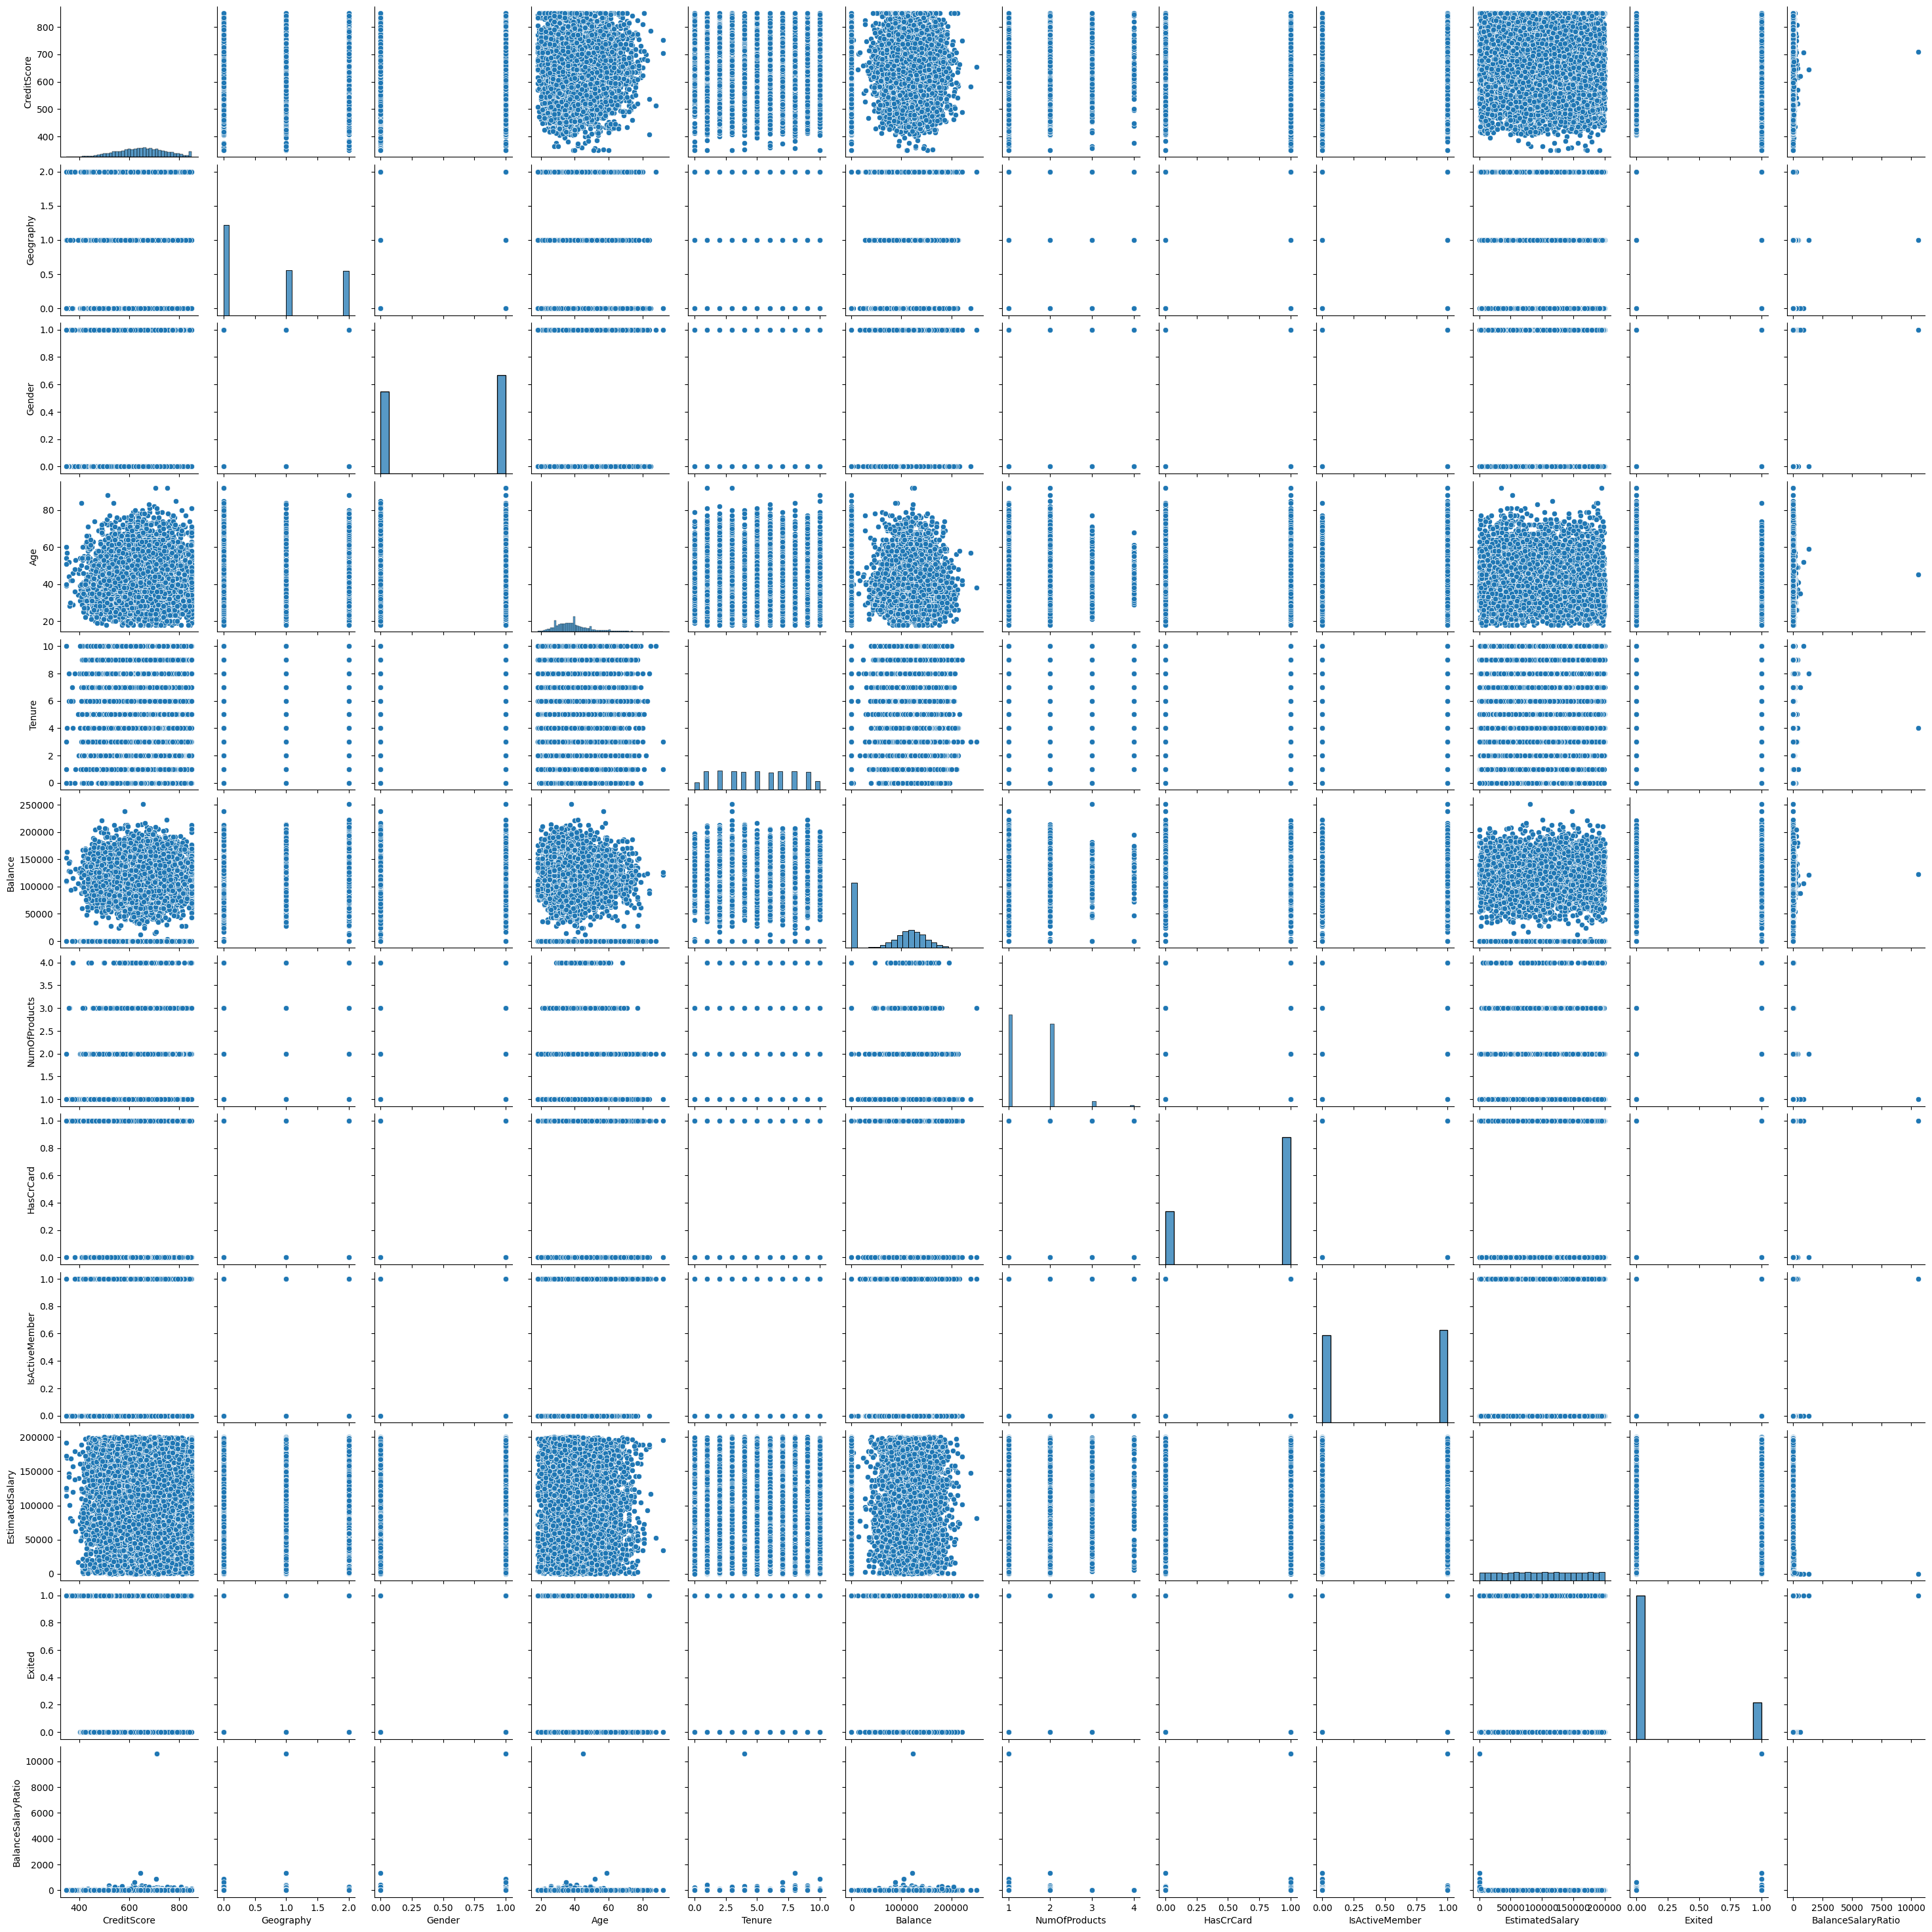

In [ ]:
sns.pairplot(data)

<Axes: >

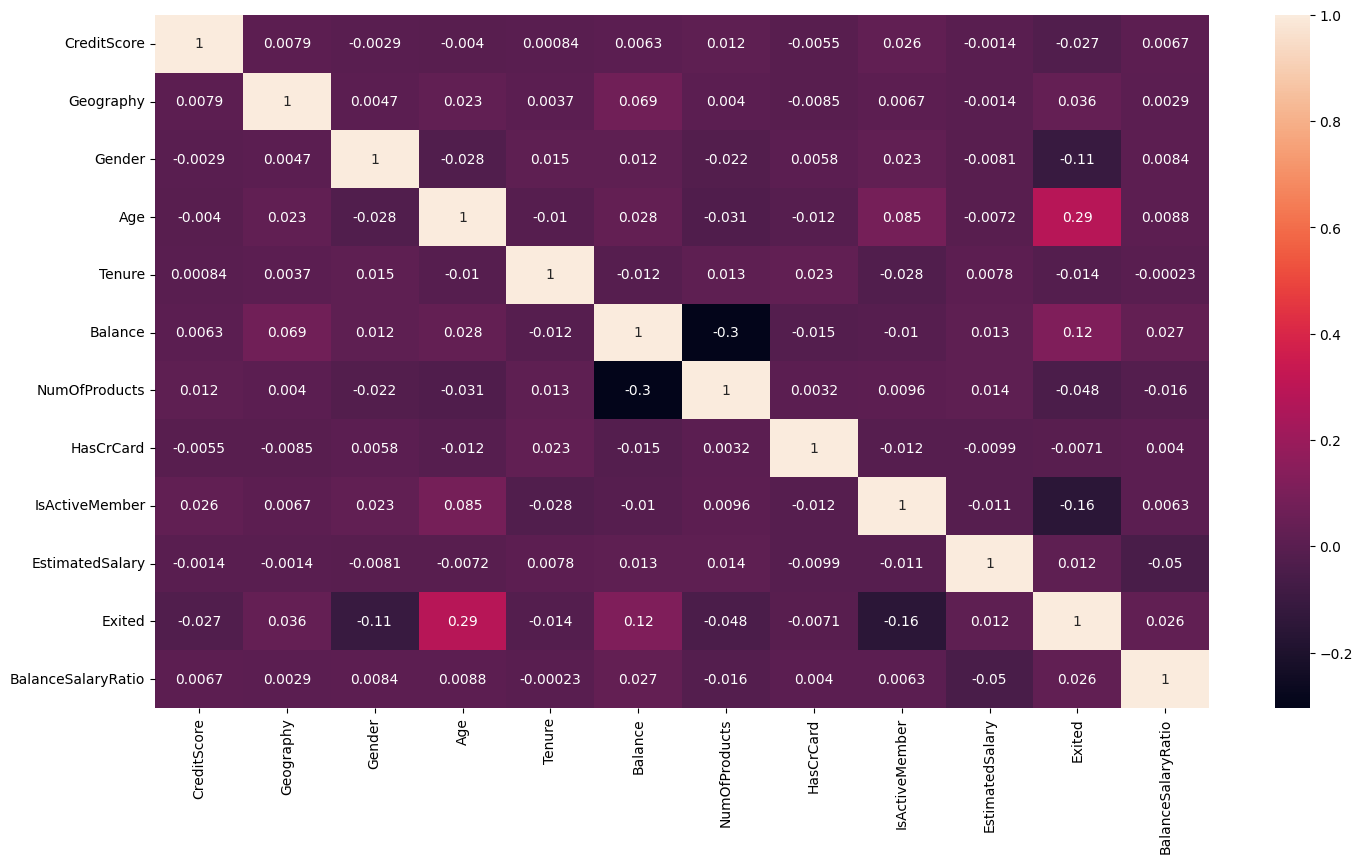

In [ ]:
plt.figure(figsize=(17, 9))
sns.heatmap(data.corr(), annot = True)

Text(0, 0.5, 'Count')

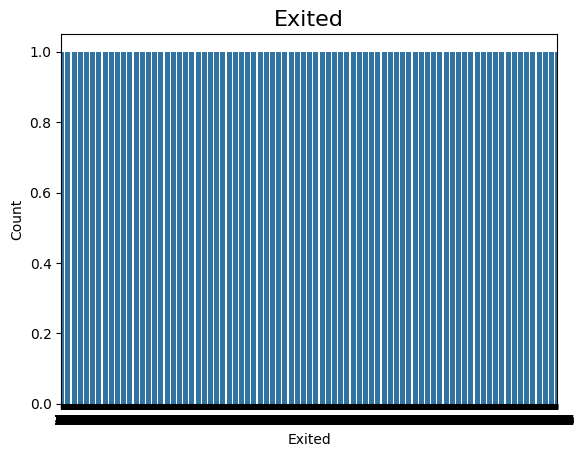

In [ ]:
sns.countplot(data['Exited'])
plt.title('Exited', fontsize = 16)
plt.xlabel('Exited')
plt.ylabel('Count')

<Axes: >

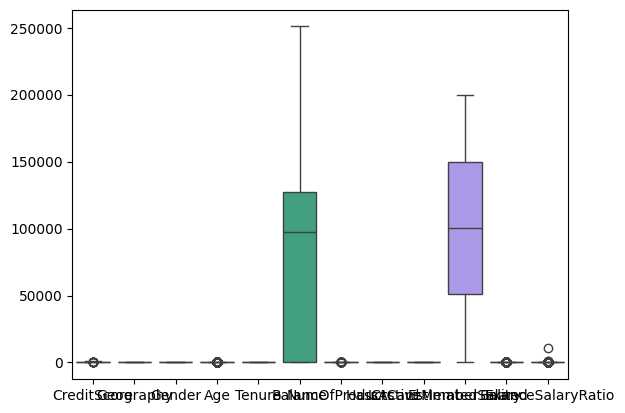

In [ ]:
sns.boxplot(data)

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

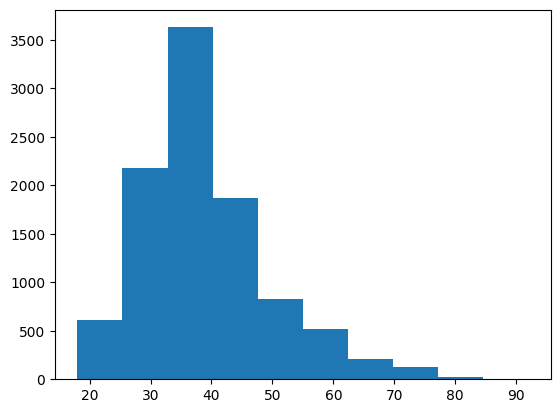

In [ ]:
plt.hist(data['Age'])

# ***Splitting Data***

In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.000000
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,0.744677
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1.401375
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.000000
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,0.000000
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0.564108
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,0.000000
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,0.808230


In [ ]:
x = data.drop('Exited', axis=1)
x


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio
0,619,0,0,42,2,0.00,1,1,1,101348.88,0.000000
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0.744677
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1.401375
3,699,0,0,39,1,0.00,2,0,0,93826.63,0.000000
4,850,2,0,43,2,125510.82,1,1,1,79084.10,1.587055
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0.000000
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0.564108
9997,709,0,0,36,7,0.00,1,0,1,42085.58,0.000000
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,0.808230


In [ ]:
y = data['Exited']
y


,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# ***Modeling***

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr.score(x_test, y_test)

0.801

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)


GradientBoostingClassifier()

In [ ]:
gb.score(x_train, y_train)

0.871125

In [ ]:
gb.score(x_test, y_test)

0.868

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(x_train, y_train)

1.0

In [ ]:
rf.score(x_test, y_test)

0.8645

In [ ]:
from sklearn.svm import SVC
svc =  SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
svc.score(x_train, y_train)

0.7945

In [ ]:
svc.score(x_test, y_test)

0.8035

In [ ]:
y_pred = svc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# ***Scaling Data***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train_scaled = mm.fit_transform(x_train)
x_test_scaled = mm.fit_transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

# ***Model Evaluation***

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1607,    0],
       [ 393,    0]])

In [ ]:
cr = classification_report(y_test, y_pred)
cr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.80      1.00      0.89      1607\n           1       0.00      0.00      0.00       393\n\n    accuracy                           0.80      2000\n   macro avg       0.40      0.50      0.45      2000\nweighted avg       0.65      0.80      0.72      2000\n'

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.8035